# Analysis of Nobel Prize Laureates (1901-2023)

## Introduction

The Nobel Prize, awarded since 1901, is one of the most prestigious international accolades. Each year, prizes are bestowed in six categories: Chemistry, Literature, Physics, Physiology or Medicine, Economics, and Peace.

In this project, we will explore and analyze data on Nobel Prize laureates from 1901 to 2023, provided by the Nobel Foundation through their API.

Our analysis aims to answer several key questions, including:

1. What is the most commonly awarded gender and birth country among laureates?
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners across all categories?
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
4. Who was the first woman to receive a Nobel Prize, and in what category?
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

Through this analysis, we will uncover fascinating trends and valuable insights into the history of Nobel Prizes.

Let's begin our exploration!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Dataset/nobel.csv")

In [3]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [5]:
df.shape

(1000, 18)

### 1. What is the most commonly awarded gender and birth country among laureates?

In [6]:
top_nobel_coutry_sum = df["birth_country"].groupby(df['prize']).agg('sum').value_counts()

In [7]:
top_nobel_coutry_sum

birth_country
United States of America                            64
United Kingdom                                      27
France                                              27
United States of AmericaUnited States of America    26
0                                                   21
                                                    ..
Guadeloupe Island                                    1
Bosnia (Bosnia and Herzegovina)                      1
Ottoman Empire (Turkey)                              1
Austria-Hungary (Ukraine)Germany                     1
CanadaUnited States of AmericaNetherlands            1
Name: count, Length: 281, dtype: int64

In [8]:
top_nobel_gender = df["sex"].groupby(df['prize']).agg('sum').value_counts()

In [9]:
top_nobel_gender

sex
Male                  319
MaleMale              125
MaleMaleMale           97
Female                 28
0                      20
MaleFemaleMale          8
MaleMaleFemale          7
FemaleMale              6
MaleFemale              6
FemaleFemale            2
FemaleFemaleFemale      1
FemaleMaleMale          1
FemaleFemaleMale        1
Name: count, dtype: int64

So we can see that the top 3 countries are the USA, United Kingdom, and Germany. As for gender, men have received the most Nobel Prizes.

### 2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners across all categories?

In [10]:
birth_nobel_prize 

NameError: name 'birth_nobel_prize' is not defined

In [ ]:
us_birth_nobel = df[df["birth_country"] == "United States of America"]


In [ ]:
us_birth_nobel.shape

In [ ]:
us_birth_nobel["birth_date"].dtype

In [20]:
def corriger_date(valeur):
    if pd.isna(valeur):
        return pd.NaT
    if isinstance(valeur, (int, float)):
        return pd.to_datetime(str(int(valeur)), format='%Y')
    if isinstance(valeur, str):
        if '-00-00' in valeur:
            return pd.to_datetime(valeur[:4], format='%Y')
        else:
            return pd.to_datetime(valeur, errors='coerce')
    return pd.NaT

In [ ]:
us_birth_nobel['birth_date'] = us_birth_nobel['birth_date'].apply(corriger_date)

In [ ]:
us_birth_nobel['birth_date'] = pd.to_datetime(us_birth_nobel['birth_date'])

In [ ]:
us_birth_nobel['birth_year'] = us_birth_nobel['birth_date'].dt.year

In [ ]:
us_birth_nobel[us_birth_nobel["birth_year"].isna()]

In [ ]:
us_birth_nobel['birth_year'].min()

In [ ]:
us_birth_nobel['birth_year'].max()

In [ ]:
us_birth_nobel["birth_year"].value_counts().sum

Now we index value by decade to analyse the result

In [ ]:
bins = [1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970]
labels = ['1840-1850','1850-1860', '1860-1870', '1870-1880', '1880-1890', '1890-1900',
          '1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970']

In [ ]:
us_birth_nobel["decade"] = pd.cut(us_birth_nobel["birth_year"], bins=bins, labels=labels, right=False)

In [ ]:
us_birth_nobel["decade"]

In [ ]:
seeNan_value = us_birth_nobel[us_birth_nobel["decade"].isna()]

In [ ]:
seeNan_value.shape

In [ ]:
seeNan_value

We can find is birth date to update the dataset so it was born on 22/09/1959 so we add that on the dataset 

In [ ]:
us_birth_nobel.loc[850, 'decade'] = '1950-1960'

In [ ]:
seeNan_value

In [ ]:
seeNan_value = us_birth_nobel[us_birth_nobel["decade"].isna()]

In [ ]:
seeNan_value

In [ ]:
top_decade = us_birth_nobel['decade'].value_counts()

In [ ]:
top_decade

In [ ]:
df = top_decade.reset_index()
df.columns = ['decade', 'counts']  

In [ ]:
df

In [ ]:
plt.style.use('grayscale')
sns.barplot(data=df, x="decade", y="counts")
plt.xticks(rotation = 45)
plt.xlabel("")
plt.title('Decadal Comparison of US-Born Nobel Prize Winners')



We can see that the 1940-1950 decade had the highest number of US-born Nobel Prize winners, with a total of 60 laureates.

### 3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?

First, we will **isolate** the female laureates and **create** a new DataFrame to **analyze** their contributions more effectively.

In [14]:
df["sex"].unique()

array(['Male', 'Female', nan], dtype=object)

In [17]:
df[pd.isna(df['sex'])]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We observe that the NaN values for the 'sex' column correspond to organizations or associations, indicating that these entries are not errors in the data.

In [11]:
female_laureates = df[df["sex"] == "Female" ]

In [12]:
female_laureates.shape

(65, 18)

We can observe that there are 65 female laureates in the dataset

In [18]:
female_laureates["birth_date"].dtype

dtype('O')

We need to convert the data type of the relevant columns to a date format. To achieve this, we will utilize the functions we created for Question 2.

After the conversion, we will conduct a similar analysis to determine the minimum and maximum values, and subsequently create decade columns for further categorization.

In [21]:
female_laureates['birth_date'] = female_laureates['birth_date'].apply(corriger_date)

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_4910/3504778239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_laureates['birth_date'] = female_laureates['birth_date'].apply(corriger_date)


In [22]:
female_laureates['birth_date'] = pd.to_datetime(female_laureates['birth_date'])

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_4910/2935000101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_laureates['birth_date'] = pd.to_datetime(female_laureates['birth_date'])


In [24]:
female_laureates['birth_year'] = female_laureates['birth_date'].dt.year

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_4910/2232238568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_laureates['birth_year'] = female_laureates['birth_date'].dt.year


In [25]:
female_laureates[female_laureates["birth_year"].isna()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year


In [27]:
female_laureates['birth_year'].min()

1843

In [28]:
female_laureates['birth_year'].max()

1997

In [51]:
bins = [1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
labels = ['1840-1850','1850-1860', '1860-1870', '1870-1880', '1880-1890', '1890-1900',
          '1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010']

In [52]:
female_laureates["decade"] = pd.cut(female_laureates["birth_year"], bins=bins, labels=labels, right=False)

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_4910/2990091882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_laureates["decade"] = pd.cut(female_laureates["birth_year"], bins=bins, labels=labels, right=False)


In [55]:
top_female_decade = female_laureates["decade"].value_counts()

In [56]:
top_female_decade

decade
1940-1950    14
1960-1970     8
1950-1960     7
1930-1940     6
1860-1870     4
1890-1900     4
1900-1910     4
1910-1920     4
1970-1980     4
1920-1930     3
1990-2000     2
1880-1890     2
1840-1850     1
1850-1860     1
1870-1880     1
1980-1990     0
2000-2010     0
Name: count, dtype: int64

Without plotting the results, we can observe that the decade from 1940 to 1950 has the highest number of Nobel laureates, with a total of 14 awarded during this period.

For better visibility of the results, we will nonetheless create a graph to illustrate these findings. 

In [58]:
top_female_decade = top_female_decade.reset_index()
top_female_decade.columns = ['decade', 'counts']  

Text(0.5, 1.0, 'Decadal Comparison of Female Nobel Prize Winners')

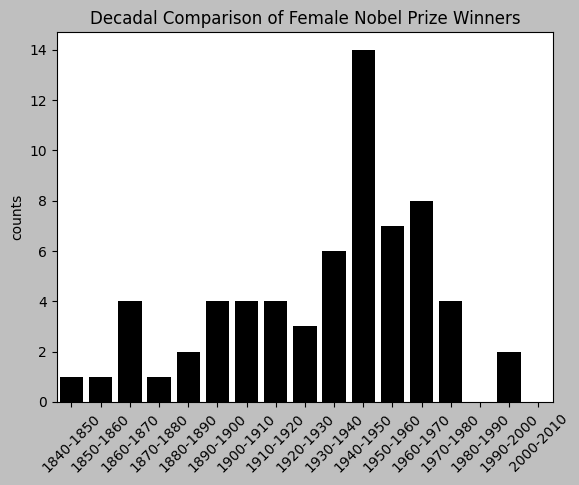

In [59]:
plt.style.use('grayscale')
sns.barplot(data=top_female_decade, x="decade", y="counts")
plt.xticks(rotation = 45)
plt.xlabel("")
plt.title('Decadal Comparison of Female Nobel Prize Winners')



For this question, we aim to identify which combination of Nobel Prize categories has the highest proportion of female laureates, rather than focusing solely on the decade.

In [93]:
top_female_combinaison = female_laureates.groupby('category')['decade'].value_counts()

In [94]:
top_female_combinaison_df = top_female_combinaison.reset_index(name='count')

In [95]:
top_values = top_female_combinaison_df.loc[top_female_combinaison_df.groupby('category')['count'].idxmax()]

In [96]:
top_values

,category,decade,count
0,Chemistry,1960-1970,3
17,Economics,1930-1940,1
34,Literature,1940-1950,4
51,Medicine,1940-1950,4
68,Peace,1940-1950,5
85,Physics,1950-1960,2


The combination of the decade 1940-1950 and the Peace category had the highest proportion of female Nobel laureates.

### 4. Who was the first woman to receive a Nobel Prize, and in what category?

In [98]:
female_laureates.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'birth_year', 'decade'],
      dtype='object')

In [100]:
female_laureates['year'].min()

1903

In [103]:
female_laureates["category"][female_laureates['year'] == 1903]

19    Physics
Name: category, dtype: object

In [ ]:
The first 

In [104]:
female_laureates[female_laureates['year'] == 1903]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1867,1860-1870


**Marie Curie** made history in **1903** as the first woman to be awarded a Nobel Prize, receiving the prestigious honor in the field of **Physics**.

### 5. Which individuals or organizations have won more than one Nobel Prize throughout the years?